# Lorentz transformation
In this lesson we will practice using the Lorentz transformation on position and momentum vectors.

## Pre-requisites
First we need to load the modules we need. We can also check whether loading was succeful and the version of the imported module.

In [88]:
import math
from math import sqrt

numpy is typically imported as np:

In [89]:
import numpy as np
np.__version__

'1.20.1'

We will use matplotlib for plotting:

In [90]:
import matplotlib.pyplot as plt 

We will now import the pylorentz module, which will allow us to define a general 4-vector class followed by 4-momentum and 4-position subclasses.

In [91]:
from pylorentz import Position4, Momentum4

## Space-time separation

Recall the definition of space-time separation:
$$ \Delta s_{12}^2 = c(t_2 - t_1)^2 - (x_2 - x_1)^2 - (y_2 - y_1)^2 - (z_2 - z_1)^2 $$
The `Vector4` class in `pylorentz` automatically includes the metric in the definition of the multiplication operator. So for two 4-vectors `x_1` and `x_2`, 
`Delta_s12_2 = (x_2 - x_1) * (x_2 - x_1) = (x_2 - x_1).mag2`

Note that `pylorentz` assumes that $ c= 1 $.

In [92]:
x_1 = Position4(0,0,0,0)
x_2 = Position4(1,3,0,0)
Delta_s12_2 = (x_2 - x_1) * (x_2 - x_1)
print(Delta_s12_2)
print((x_2-x_1).mag2)
print((x_2[0]-x_1[0])**2 - (x_2[1]-x_1[1])**2 - (x_2[2]-x_1[2])**2 - (x_2[3]**2-x_1[3])**2)

-8
-8
-8


Is the separation between `x_1` and `x_2` space-like or time-like? Why?

Write your answer here: [1 mark]

Let's perform a Lorentz transform into the inertial system where the two events occur at the same time.
To do this, we use the `boost` method. The first three coordinates specify the direction of the relative velocity between the two inertial systems. The final parameter specifies the magnitude of the velocity, either in terms of $ \beta = v/c $ or $ \gamma = \frac{1}{\sqrt{1-\beta^2}}$.


In [93]:
beta = 1/3
x_1_prime = x_1.boost(1,0,0,beta=beta)  
print(x_1_prime)
x_2_prime = x_2.boost(1,0,0,beta=beta)
print(x_2_prime)

Position4(0, 0, 0, 0)
Position4(0, 2.82843, 0, 0)


Let's check that the Lorentz transform works the way we expect.
$$ \begin{pmatrix} x^{\prime 0} & x^{\prime 1} & x^{\prime 2} & x^{\prime 3} \\ \end{pmatrix}
 = \begin{pmatrix} \gamma & -\gamma\beta & 0 & 0 \\ -\gamma\beta & \gamma & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ \end{pmatrix}
   \begin{pmatrix} x^0 \\ x^1 \\ x^2 \\ x^3 \\ \end{pmatrix} $$

In [94]:
gamma = 1 / sqrt(1 - beta**2)
print(gamma*x_2[0] - gamma * beta * x_2[1], ",", - gamma * beta * x_2[0] + gamma * x_2[1], ",", x_2[2], ",", x_2[3])

0.0 , 2.82842712474619 , 0 , 0


Let's calculate the space-time separation in the primed inertial system. Because space-time separation is invariant, they should be the same.

In [95]:
Delta_s12_2_prime = (x_2_prime - x_1_prime) * (x_2_prime - x_1_prime)
print(Delta_s12_2_prime)

-7.999999999999998


Repeat the above exercise for two 4-vectors with $ x_1 = (0,0,0,0), x_3 = (3,1,0,0),$ and $\beta = 1/3 $. [5 marks]


In [96]:
### Your code here

What is the difference in time betweeen the two events in the primed frame? 

Write your answer here: [1 mark]

What is the difference in spatial position betweeen the two events in the primed frame? 

Write your answer here: [1 mark]

What is the space-time separation between the two events? 

Write your answer here: [1 mark]

Is the separation space-like or time-like?

Write your answer here: [1 mark]

### Minkowski diagram
Let's plot the three events above on a Minkowski diagram. First we will define a class to display Minkowski diagrams. (You can just run the code and scroll down.)

In [97]:
savefigteller=0
class Minkowski_diagram :
    def __init__(self):
        self.canvassize_x=12
        self.canvassize_y=6
        self.size_x=20
        self.size_y=10
        self.worldline_v=[]
        self.worldline_x=[]
        self.worldline_color=[]
        self.worldline_time_axis=[]
        self.worldline_time_null=[]
        self.lightcircle_x=[]
        self.lightcircle_t=[]
        self.lightcircle_color=[]
        self.spacetimehyperbola=[]
        self.relativespeed=0
    def LTX(self,x,t):
        LT_x=(x-self.relativespeed*t)*1/math.sqrt(1-self.relativespeed**2)
        return LT_x
    def LTT(self,x,t):
        LT_t=(t-self.relativespeed*x)*1/math.sqrt(1-self.relativespeed**2)
        return LT_t
    def ILTT(self,x,t,v):
        ILT_t=t*math.sqrt(1-v**2)+v*x
        return ILT_t
    def ILTX(self,x,t,v):
        ILT_x=x*math.sqrt(1-v**2)+v*t
        return ILT_x
    def define_spacetime_hyperbola(self,spacetime_distance_squared):
        self.spacetimehyperbola.append(spacetime_distance_squared)
    def define_wordline(self,x,v,color,axis,time_null):
        self.worldline_v.append(v)
        self.worldline_x.append(x)
        self.worldline_color.append(color)
        self.worldline_time_axis.append(axis)
        self.worldline_time_null.append(time_null)
    def define_lightcircle(self,t,x,color):
        self.lightcircle_x.append(x)
        self.lightcircle_t.append(t)
        self.lightcircle_color.append(color)
    def set_frame_of_reference(self,v):
        self.relativespeed=v
    def show(self):
         global savefigteller
         plt.rcParams["figure.figsize"] = (self.canvassize_x,self.canvassize_y)
         plt.xlim(-self.size_x/2,self.size_x/2)    
         plt.ylim(0,self.size_y)
         plt.xlabel('x ->')
         plt.ylabel('t->')
         gamma=1/math.sqrt(1-self.relativespeed**2)
         data_x=[]
         data_min_x=[]
         data_y=[]
         for t in range (0,self.size_y*25,1):
             data_x.append(t/25)
             data_min_x.append(-t/25)
             data_y.append(t/25)
         plt.scatter(data_x,data_y,c='y',s=1)
         plt.scatter(data_min_x,data_y,c='y',s=1)
         for i in range (len(self.spacetimehyperbola)):
             data_x=[]
             data_y=[]
             if self.spacetimehyperbola[i]>0:
                 for k in range (-self.size_x*4,self.size_x*4):
                  data_x.append(k/4)
                  data_y.append(math.sqrt(self.spacetimehyperbola[i]+(k/4)**2))
             else:
                 for k in range (0,self.size_y*4):
                  data_y.append(k/4)
                  data_x.append(math.sqrt(-self.spacetimehyperbola[i]+(k/4)**2))
             plt.scatter(data_x,data_y,c="k",s=2)
         for i in range (len(self.worldline_v)):
             data_x=[]
             data_y=[]
             if self.worldline_time_axis[i]=='yes':
                 for k in range (-self.size_x,self.size_x):
                   for l in range (0,5):
                     j=k+l/20
                     v=self.ILTT(j,self.worldline_time_null[i],self.worldline_v[i])
                     x=self.LTX(j,v)
                     t=self.LTT(j,v)
                     data_x.append(x)
                     data_y.append(t)
                 plt.scatter(data_x,data_y,c=self.worldline_color[i],s=1)
                 v=self.ILTT(-1,self.worldline_time_null[i],self.worldline_v[i])
                 x=self.LTX(-1,v)
                 t=self.LTT(-1,v)
                 if (t<self.size_y) and (t>0):
                  plt.text (x,t+0.1,'t='+str(self.worldline_time_null[i]))

             t_max = self.LTT(self.worldline_x[i]+self.worldline_v[i]*self.size_y,self.size_y)   
             data_x=[]
             data_y=[]
             for j in range (0,int(self.size_y*self.size_y/t_max*100),int(self.size_y*self.size_y/t_max*100/50)):
                 t = self.LTT(self.worldline_x[i]+self.worldline_v[i]*j/100,j/100)   
                 x = self.LTX(self.worldline_x[i]+self.worldline_v[i]*j/100,j/100)   
                 data_x.append(x)
                 data_y.append(t)
             plt.scatter(data_x,data_y,c=self.worldline_color[i],s=1)
             if self.worldline_x[i]==0 :
                 plt.text (x,t+0.3,'v='+str(self.worldline_v[i])+"c")
         for i in range (len(self.lightcircle_x)):
             x=self.LTX(self.lightcircle_x[i],self.lightcircle_t[i])
             t=self.LTT(self.lightcircle_x[i],self.lightcircle_t[i])
             data_x=[]
             data_min_x=[]
             data_y=[]
             for j in range (int(t*1000),self.size_y*1000,50):
                 data_x.append(x+j/1000-t)
                 data_min_x.append(x-j/1000+t)
                 data_y.append(j/1000)
             plt.scatter(data_x,data_y,c=self.lightcircle_color[i],s=1)
             plt.scatter(data_min_x,data_y,c=self.lightcircle_color[i],s=1)
             plt.scatter(x,t,marker="x",c="k")
         plt.text (-self.size_x/2+1,0.5,'vref='+str(self.relativespeed)+"c")
         fname = 'MIN%04d.png' % savefigteller
         plt.savefig(fname)
         savefigteller=savefigteller+1
         plt.show()


Let's use this class with our example events.

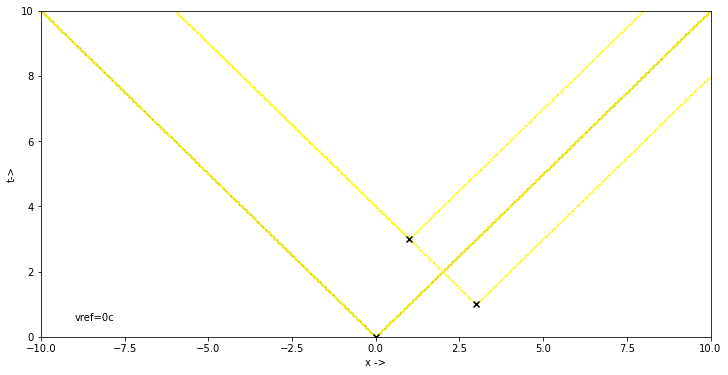

In [168]:
M=Minkowski_diagram()
M.define_lightcircle(0,0,'#fbfb00')
M.define_lightcircle(1,3,'#fbfb00') 
M.define_lightcircle(3,1,'#fbfb00')
M.show()

What do the yellow lines represent? 

Write your answer here: [1 mark]

Let's draw world lines for $\beta = 0$.

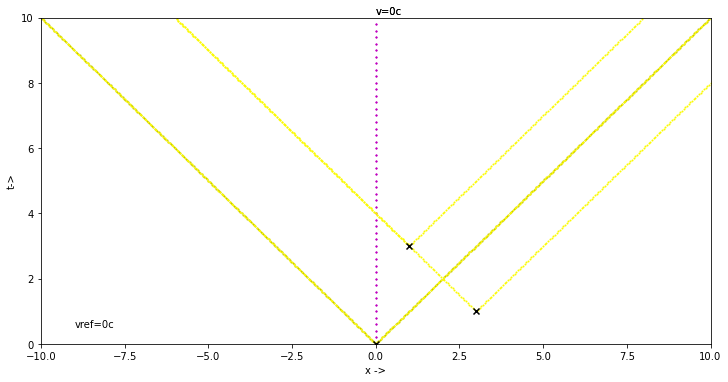

In [169]:
M.define_wordline(0,0,'m','no',1)
M.define_wordline(0,0,'m','no',3)
M.show()

What is a worldline?

Write your answer here: [1 mark]

Let's add lines of simultaneity.

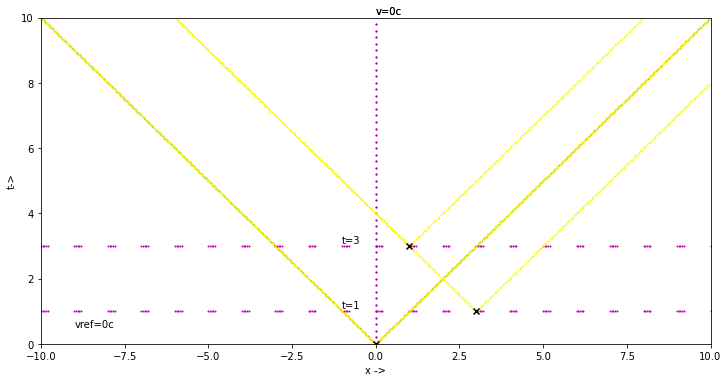

In [170]:
M.worldline_time_axis[0]="yes"
M.worldline_time_axis[1]="yes"
M.show()

What is a line of simultaneity?

Write your answer here: [1 mark]

Let's add world lines for $\beta = 1/3$.

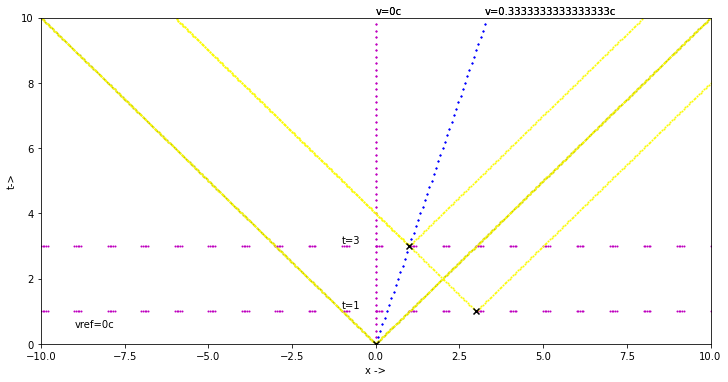

In [171]:
M.define_wordline(0,1/3,'b','no',0)
M.define_wordline(0,1/3,'b','no',2.82842712474619)

M.show()

What is the slope of this worldline? Why is it slanted with respect to the other one? [2 marks]

Write your answer here: [2 marks]

Now let's add the lines of simultaneity for $\beta=1/3$.

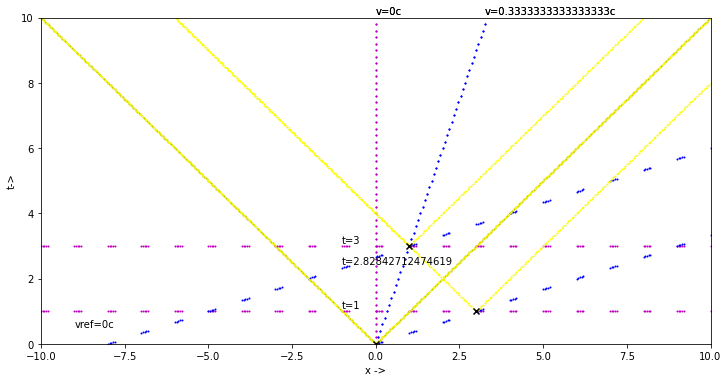

In [172]:
M.worldline_time_axis[2]="yes"
M.worldline_time_axis[3]="yes"
M.show()

What is the slope of these lines?

Write your answer here: [1 mark]

Let's set the frame of reference (the one where the axes are perpendicular) to the primed frame.

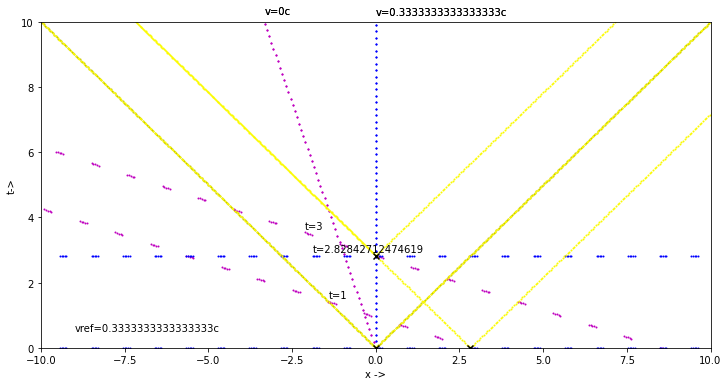

In [173]:
M.set_frame_of_reference(1/3)
M.show() 

What are the new slopes of the unprimed worldline and lines of simultaneity?

Write your answer here: [2 marks]

Let's draw the hyperbolae of invariance (i.e. the curves of constant space-time separation).

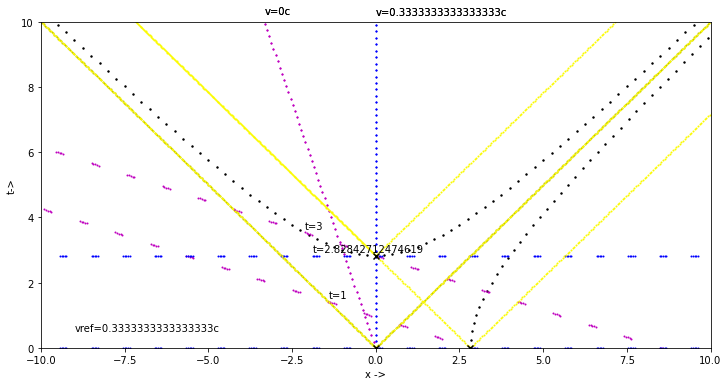

In [174]:
M.define_spacetime_hyperbola(8)
M.define_spacetime_hyperbola(-8)
M.show()

Now let's shift the frame of reference back to the unprimed frame.

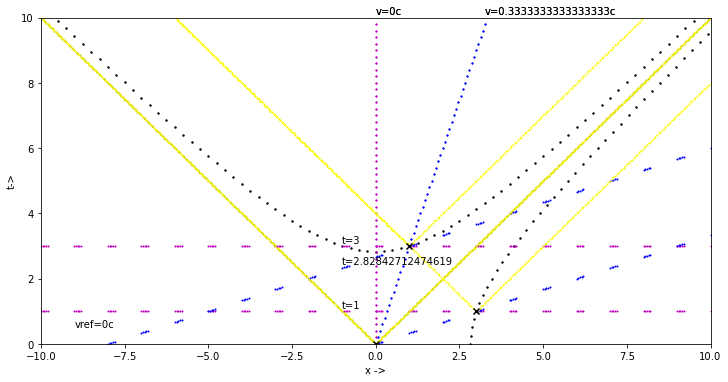

In [175]:
M.set_frame_of_reference(0)
M.show() 

Notice that as the frame of reference shifts, the events stay on their respective hyperbolae as they move. Why?

Write your answer here: [1 mark]

Let's set the frame of reference to $\beta = 2/3$. In this frame of reference, $x_2$ occurs before $x_1$. 

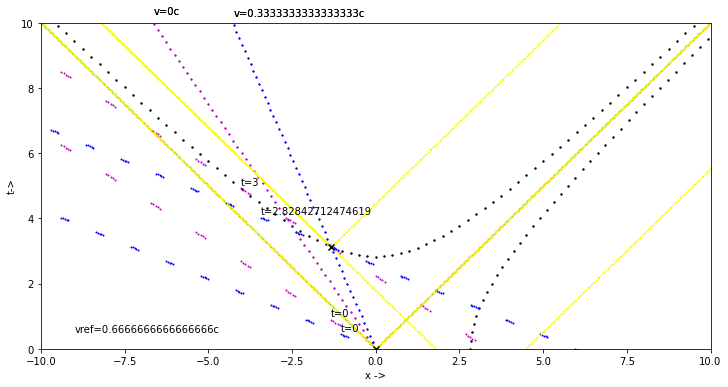

In [142]:
M.set_frame_of_reference(2/3)
M.show()

Is there a frame of reference where $x_3$ occurs before $x_1$? Why or why not?

Write your answer here [2 marks]:

Is there a frame of reference where $x_1$ and $x_2$ occur at the same position? Why or why not?

Write your answer here [2 marks]:


### Time dilation
Let's use the 4-position vectors to examine time dilation.

In [106]:
distance = 1
beta = 0.9
gamma = (1 - beta**2)**(-0.5)
print, gamma

Delta_t = 2 * distance

Event0 = Position4(0,0,0,0)
Event1 = Position4(0.5 * Delta_t, 0, distance, 0)
Event2 = Position4(Delta_t, 0, 0, 0)
print(repr(Event0))
print(repr(Event1))
print(repr(Event2))

Event0_prime = Event0.boost(1,0,0,beta)
print(repr(Event0_prime))
Event1_prime = Event1.boost(1,0,0,beta)
print(repr(Event1_prime))
Event2_prime = Event2.boost(1,0,0,beta)
print(repr(Event2_prime))

Delta_t_prime = Event2_prime[0] - Event0_prime[0]
print(Delta_t_prime)
print(Delta_t_prime / Delta_t)
print(gamma)

Position4(0, 0, 0, 0)
Position4(1, 0, 1, 0)
Position4(2, 0, 0, 0)
Position4(0, 0, 0, 0)
Position4(2.29416, -2.06474, 1, 0)
Position4(4.58831, -4.12948, 0, 0)
4.588314677411236
2.294157338705618
2.294157338705618


### Velocity addition

In [107]:
v1 = 0.5
gamma1 = (1-v1*v1)**(-0.5)
v2 = 0.3
gamma2 = (1-v2*v2)**(-0.5)

p1 = Momentum4(gamma1,gamma1*v1,0,0)
p3 = p1.boost(-1,0,0,beta=v2)

print(repr(p1), repr(p3))
print(p3[1]/p3[0])
print((v1+v2)/(1+v1*v2))

Momentum4(1.1547, 0.57735, 0, 0) Momentum4(1.39202, 0.968364, 0, 0)
0.6956521739130435
0.6956521739130436


## Inverse Compton Scattering


## Submission

Before you submit your work you should make a few checks that everything works fine.

1. Save your notebook as a PDF (File->Download As->PDF). This document will help you debugging in the next step.
1. If PDF export does not work: You can do File->Print Preview and then print to a file.
1. Restart the kernel and rerun the entire notebook (Kernel->Restart & Run All). This will delete all variables (but not your code) and rerun the notebook in one go. If this does not go through the endthen you have to fix it. You will see at which cell the run stopped. A common mistake is using a variable that is defined only at a later stage.
1. You think you fixed everything? Redo step 2 (Kernel->Restart & Run All)

You have to download and submit 2 files, the jupyter notebook and a pdf.
- Jupyter notebook. File->Download As->Notebook (.ipynb). Save this file on your disk.
- PDF file. File->Download As->PDF. Save this file on your disk.
- If PDF export does not work. You can do File->Print Preview and then print to a file.

Please submit the two files on Ulwazi.